# Notebook xây dựng mô hình CNN với input data là dữ liệu spectrogram được tạo từ spectrogram_data.ipynb

>[Model Theory](#scrollTo=SCz4p42ztp9K)

>>[Convolutional Neural Network:](#scrollTo=SCz4p42ztp9K)

>>[mô hình mạng nơ-ron tích chập (CNN) được thiết kế để phân loại hình ảnh phổ (spectrogram) của tín hiệu EEG thành ba trạng thái tâm trí: Tập trung, Không tập trung, và Buồn ngủ. Sau đây là nền tảng lý thuyết của mô hình, bao gồm các thành phần, lý do thiết kế, và quy trình xử lý dữ liệu.](#scrollTo=SCz4p42ztp9K)

>>>[Lý thuyết về tiền xử lý dữ liệu:](#scrollTo=SCz4p42ztp9K)

>>>[Kiến trúc và Thiết kế Mô hình CNN](#scrollTo=SCz4p42ztp9K)

>>>[Mạng CNN rất hiệu quả cho dữ liệu hình ảnh nhờ khả năng tự động học các đặc trưng không gian. Kiến trúc của mô hình gồm:](#scrollTo=SCz4p42ztp9K)

>>>[Lớp đầu vào:](#scrollTo=SCz4p42ztp9K)

>>>[Các lớp tích chập:](#scrollTo=SCz4p42ztp9K)

>>>[Các lớp pooling:](#scrollTo=SCz4p42ztp9K)

>>>[Làm phẳng (Flatten):](#scrollTo=SCz4p42ztp9K)

>>>[Các lớp Dense:](#scrollTo=SCz4p42ztp9K)

>>>[Lớp đầu ra:](#scrollTo=SCz4p42ztp9K)

>>>[Huấn luyện và Đánh giá:](#scrollTo=SCz4p42ztp9K)



# Model Theory
## Convolutional Neural Network:
mô hình mạng nơ-ron tích chập (CNN) được thiết kế để phân loại hình ảnh phổ (spectrogram) của tín hiệu EEG thành ba trạng thái tâm trí: Tập trung, Không tập trung, và Buồn ngủ. Sau đây là nền tảng lý thuyết của mô hình, bao gồm các thành phần, lý do thiết kế, và quy trình xử lý dữ liệu.
---
### 1. **Lý thuyết về tiền xử lý dữ liệu**:

 -  Dữ liệu EEG được biểu diễn dưới dạng hình ảnh phổ, mã hóa thông tin tần số-thời gian của tín hiệu EEG, sử dụng phép biến đổi Fourier ngắn hạn (STFT). Quy trình tiền xử lý bao gồm.
     - a. Thu thập ảnh:
        - Hình ảnh được tổ chức theo kênh EEG và trạng thái tâm trí.
        - Chỉ chọn một tập con các thí nghiệm và kênh để giảm khối lượng tính toán.
     - b.Thay đổi kích thước ảnh:
        - Tất cả hình ảnh phổ được thay đổi kích thước về dạng chuẩn (image_size x image_size) để đảm bảo tính đồng nhất cho đầu vào CNN.
     - c. Trích xuất nhãn:
        - Nhãn được lấy từ cấu trúc thư mục, phân loại ảnh vào ba lớp: Tập trung, Không tập trung, và Buồn ngủ.
     - d. Chuẩn hóa dữ liệu:
        - Giá trị pixel được chuyển đổi về khoảng [0, 1] để đảm bảo các gradient được tính toán ổn định trong quá trình huấn luyện.

### 2. Kiến trúc và Thiết kế Mô hình CNN

### Mạng CNN rất hiệu quả cho dữ liệu hình ảnh nhờ khả năng tự động học các đặc trưng không gian. Kiến trúc của mô hình gồm:

### **Lớp đầu vào**:
- Nhận hình ảnh phổ kích thước `(image_size, image_size, 3)` (định dạng RGB).



### **Các lớp tích chập**:
- **Lớp Conv2D**:
  - Trích xuất các mẫu không gian từ phổ, như dải tần số và sự biến đổi theo thời gian.
- **Hai lớp tích chập**:
  - Học các đặc trưng từ mức độ thấp đến cao với bộ lọc kích thước `(3, 3)`, có 32 bộ lọc kích thước, trong khi lớp thứ hai có 64 bộ lọc cùng kích thước
- **Activation ReLU**:
  - Tạo tính phi tuyến, giúp mô hình nắm bắt các mẫu phức tạp.

### **Các lớp pooling**:
- **Lớp MaxPooling2D**:
  - Giúo làm phẳng các bản đồ đặc trưng thành một vector biểu diễn.
  - Giảm kích thước đặc trưng để giảm khối lượng tính toán nhưng vẫn giữ lại các đặc trưng quan trọng.


### **Làm phẳng (Flatten)**:
- Chuyển đổi ma trận đặc trưng 2D thành vector 1D để đưa vào các lớp kết nối đầy đủ.
Kiến trúc CNN:

### **Các lớp Dense**:
- **Hai lớp Dense**:
  - Với hàm kích hoạt `ReLU`, học các mối quan hệ phức tạp giữa các đặc trưng đã trích xuất.
- **Các lớp Dropout**:
  - với (tỷ lệ dropout 0,5) giúp giảm hiện tượng overfitting bằng cách loại ngẫu nhiên một số nơ-ron trong quá trình huấn luyện.


### **Lớp đầu ra**:
- **Lớp Dense**:
  - Với activation `Softmax`, đưa ra xác suất của ba lớp:
    - **Tập trung**
    - **Không tập trung**
    - **Buồn ngủ**


### **Huấn luyện và Đánh giá**:

- Mô hình được huấn luyện sử dụng tập dữ liệu đã chuẩn bị, chia thành tập huấn luyện và tập kiểm tra.
- Quá trình huấn luyện tối ưu hóa các tham số của mô hình bằng cách sử dụng bộ tối ưu hóa Adam và hàm mất mát entropy chéo phân loại, với mục tiêu là tối đa hóa độ chính xác phân loại.
- Sử dụng `early_stopping` để ngăn chặn hiện tượng quá khớp, theo dõi độ chính xác trên tập kiểm tra và phục hồi các trọng số mô hình tốt nhất.
- Sau khi huấn luyện, hiệu suất của mô hình được đánh giá trên tập kiểm tra giữ lại, báo cáo về chỉ số `test_lost` và `test_accuracy`.
- Các công cụ trực quan cũng được cung cấp để phân tích tiến trình huấn luyện và hiệu suất phân loại của mô hình, như vẽ đường cong độ chính xác huấn luyện/kiểm tra và tạo ma trận nhầm lẫn.


In [ ]:
#import các thư viện cần thiết
import matplotlib
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
from PIL import Image

In [ ]:
class EEGSpectrogramClassifier:
    def __init__(self, base_paths, selected_channel, max_experiments, image_size):
        """
        Khởi tạo classifier với data configuration

        Args:
            base_paths (list): Đường dẫn đến các danh mục dữ liệu
            selected_channel (int): Kênh EEG cụ thể được sử dụng
            max_experiments (int): Số lượng thí nghiệm tối đa trên mỗi kênh
            image_size (int): Kích thước ảnh cần resize
        """
        self.base_paths = base_paths
        self.selected_channel = selected_channel
        self.max_experiments = max_experiments
        self.image_size = image_size

    def collect_image_paths(self):
        """Thu thập đường dẫn ảnh từ một kênh cụ thể trong các danh mục"""
        all_image_paths = []
        for base_path in self.base_paths:
            # Đường dẫn đến kênh cụ thể
            channel_path = os.path.join(base_path, str(self.selected_channel))
            # Lấy danh sách thư mục trong kênh
            dirs = sorted(glob.glob(channel_path, recursive=True))

            # Lấy đường dẫn ảnh PNG từ số lượng thư mục thí nghiệm tối đa
            for dir_path in dirs[:self.max_experiments]:
                png_paths = glob.glob(os.path.join(dir_path, '*.png'), recursive=True)
                all_image_paths.extend(png_paths)

        return all_image_paths

    def load_images(self, image_paths):
        """
        Tải và tiền xử lý ảnh

        Args:
            image_paths (list): Danh sách các đường dẫn ảnh cần xử lý

        Returns:
            tuple: Dữ liệu ảnh và nhãn tương ứng
        """
        data, labels = [], []
        for image_path in image_paths:
            # Tải, resize và chuyển đổi ảnh sang định dạng RGB
            image = np.asarray(
                Image.open(image_path)
                .resize((self.image_size, self.image_size))
                .convert('RGB')
            )
            data.append(image)
            # Nhãn được trích xuất từ cấu trúc đường dẫn (thư mục cha thứ 4 từ dưới lên)
            labels.append(image_path.split(os.path.sep)[-4])

        # Chuẩn hóa dữ liệu ảnh (giá trị trong khoảng [0, 1])
        return np.array(data, dtype='float') / 255.0, np.array(labels)

    def create_model(self):
        model = Sequential([
            # Lớp tích chập đầu tiên
            Conv2D(32, (3, 3), input_shape=(self.image_size, self.image_size, 3), activation='relu'),
            MaxPooling2D(pool_size=(2, 2)),
            # Lớp tích chập thứ hai
            Conv2D(64, (3, 3), activation='relu'),
            MaxPooling2D(pool_size=(2, 2)),
            # Flatten để chuyển đổi từ ma trận sang vector
            Flatten(),
            # Lớp dày đặc (fully connected layer)
            Dense(64, activation='relu'),
            Dropout(0.5),
            # Lớp đầu ra với softmax cho phân loại 3 nhãn
            Dense(3, activation='softmax')
        ])

        model.compile(
            optimizer=Adam(learning_rate=0.0005),
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )
        return model

    def train_and_evaluate(self, epochs):
        # Thu thập và tải dữ liệu
        image_paths = self.collect_image_paths()
        dataset, labels = self.load_images(image_paths)

        # Chia tập dữ liệu thành tập huấn luyện và kiểm tra
        trainX, testX, trainY, testY = train_test_split(dataset, labels, test_size=0.2, random_state=42)

        # Mã hóa nhãn thành dạng one-hot
        lb = LabelBinarizer()
        trainY = lb.fit_transform(trainY)
        testY = lb.transform(testY)

        # Tạo và huấn luyện mô hình
        model = self.create_model()
        early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
        history = model.fit(
            trainX, trainY,
            epochs=epochs,
            validation_data=(testX, testY),
            batch_size=128,
            callbacks=[early_stopping],
            verbose=1
        )

        self.testX = testX
        self.testY = testY
        self.lb = lb


        # In kết quả theo từng epoch
        self.print_training_progress(history)

        # Đánh giá mô hình trên tập kiểm tra
        test_loss, test_acc = model.evaluate(testX, testY, verbose=0)

        return model, history, test_loss, test_acc

    def print_training_progress(self, history):
        print(f'{"Epoch":<5}{"Train Loss":<12}{"Train Acc":<12}{"Val Loss":<12}{"Val Acc":<12}')
        print('-' * 50)
        for epoch in range(len(history.history['loss'])):
            train_loss = history.history['loss'][epoch]
            train_acc = history.history['accuracy'][epoch]
            val_loss = history.history['val_loss'][epoch]
            val_acc = history.history['val_accuracy'][epoch]
            print(f'{epoch+1:<5}{train_loss:<12.4f}{train_acc:<12.4f}{val_loss:<12.4f}{val_acc:<12.4f}')

    def plot_training_history(self, history):
        """Hiển thị biểu đồ độ chính xác huấn luyện"""
        plt.figure(figsize=(10, 5))
        plt.plot(history.history['accuracy'], label='Độ chính xác huấn luyện')
        plt.plot(history.history['val_accuracy'], label='Độ chính xác kiểm tra')
        plt.title('Độ chính xác của mô hình')
        plt.xlabel('Epoch')
        plt.ylabel('Độ chính xác')
        plt.ylim([0.5, 1])
        plt.legend(loc='lower right')
        plt.show()

    def plot_classification_report_and_confusion_matrix(self, model, testX, testY, lb):
        """
        Hiển thị classification report và confusion matrix

        Args:
            model: Mô hình đã huấn luyện
            testX: Tập kiểm tra (ảnh)
            testY: Nhãn tập kiểm tra (one-hot)
            lb: LabelBinarizer để giải mã nhãn
        """
        # Dự đoán nhãn
        predictions = model.predict(testX, verbose=0)
        predicted_classes = np.argmax(predictions, axis=1)
        true_classes = np.argmax(testY, axis=1)
        class_labels = lb.classes_

        # Tạo classification report
        print("Classification Report:")
        report = classification_report(true_classes, predicted_classes, target_names=class_labels)
        print(report)

        # Tạo confusion matrix
        cm = confusion_matrix(true_classes, predicted_classes)

        # Vẽ confusion matrix
        plt.figure(figsize=(10, 7))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()

# Ví dụ sử dụng trong Jupyter Notebook
base_paths = ['./DROWSY/**', './FOCUSED/**', './UNFOCUSED/**']
classifier = EEGSpectrogramClassifier(base_paths, selected_channel=10, max_experiments=10, image_size=128)
model, history, test_loss, test_acc = classifier.train_and_evaluate(epochs=50)

# In kết quả theo từng epoch trong quá trình huấn luyện
classifier.print_training_progress(history)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


I0000 00:00:1733402379.412843     185 service.cc:145] XLA service 0x7f5ebc004240 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733402379.412902     185 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1733402379.412906     185 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  3/113 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.3056 - loss: 1.8857 

I0000 00:00:1733402386.157697     185 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


113/113 ━━━━━━━━━━━━━━━━━━━━ 19s 99ms/step - accuracy: 0.3356 - loss: 1.2366 - val_accuracy: 0.3819 - val_loss: 1.0861
Epoch 2/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.3658 - loss: 1.0902 - val_accuracy: 0.4708 - val_loss: 1.0792
Epoch 3/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.3737 - loss: 1.0799 - val_accuracy: 0.5125 - val_loss: 1.0765
Epoch 4/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.4187 - loss: 1.0641 - val_accuracy: 0.5253 - val_loss: 1.0015
Epoch 5/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.4165 - loss: 1.0304 - val_accuracy: 0.5295 - val_loss: 0.9416
Epoch 6/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.4731 - loss: 0.9894 - val_accuracy: 0.5387 - val_loss: 0.9461
Epoch 7/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.4870 - loss: 0.9684 - val_accuracy: 0.5435 - val_loss: 0.9180
Epoch 8/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.4881 - loss: 0.9673 - val_accuracy: 0.54

Classification Report:
              precision    recall  f1-score   support

      DROWSY       0.79      0.55      0.65      1198
     FOCUSED       0.50      0.74      0.60      1221
   UNFOCUSED       0.44      0.35      0.39      1171

    accuracy                           0.55      3590
   macro avg       0.57      0.55      0.54      3590
weighted avg       0.57      0.55      0.55      3590



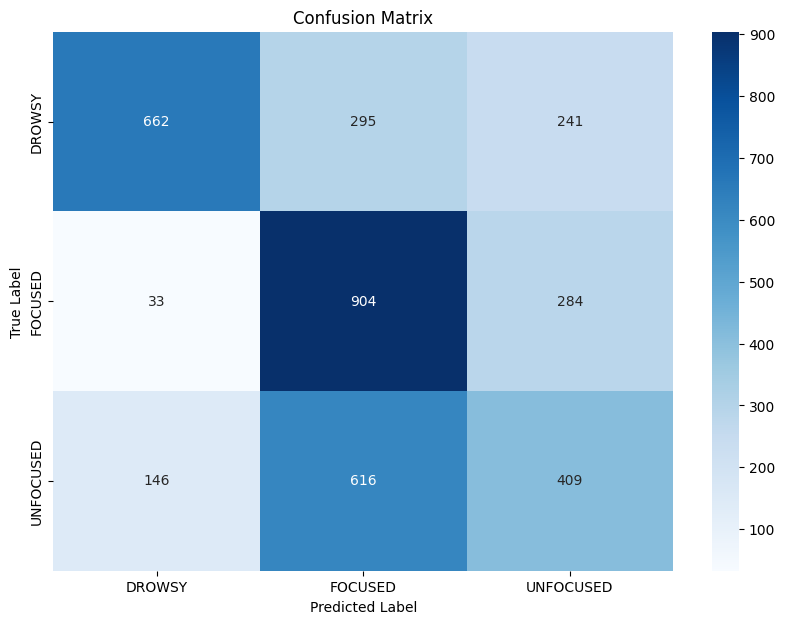

In [ ]:
classifier.plot_classification_report_and_confusion_matrix(model, classifier.testX, classifier.testY, classifier.lb)

- Khi huấn luyện mô hình CNN này, tôi chỉ có thể huấn luyện trên từng kênh EEG cụ thể và với một số lượng thí nghiệm (ảnh) nhất định do giới hạn về dữ liệu. Điều này có thể dẫn đến chênh lệch trong kết quả so với việc sử dụng toàn bộ dữ liệu.
- Tuy nhiên, tôi đã thử huấn luyện mô hình trên rất nhiều kênh EEG khác nhau và với các tập con thí nghiệm khác nhau, cùng với đó là vô số lần hiệu chỉnh các hyperparameters như learning rate, batch size, các lớp layers, số lượng bộ lọc trong từng layer, cả lớp convolutional layers và pooling layers. Kết quả cho thấy độ chính xác trên tập kiểm tra (test_accuracy) hội tụ về khoảng 0,55 trong các trường hợp này.
Mặc dù không đạt được độ chính xác cao như mong muốn, nhưng việc thu được mức độ chính xác ổn định xung quanh 0,55 khi thử nghiệm trên các kênh và tập con dữ liệu khác nhau gợi ý rằng mô hình này có thể tổng quát hóa tương đối tốt. Nó không chỉ hoạt động tốt trên một kênh hoặc một tập con dữ liệu cụ thể, mà có khả năng áp dụng được trên nhiều kênh khác nhau.
- Trong bối cảnh này, mặc dù mức độ chính xác chưa đạt được như mong muốn, nhưng sự ổn định của kết quả trên các tập dữ liệu khác nhau là một dấu hiệu tích cực về khả năng tổng quát hóa của mô hình. Điều này có thể đóng góp giá trị vào việc phân loại trạng thái tâm lý từ dữ liệu EEG trong các ứng dụng thực tế.